In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [13]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1) 

#Your code:
model.fit(X, y)
print(model)

#Hint: .fit()

LinearRegression(n_jobs=1)


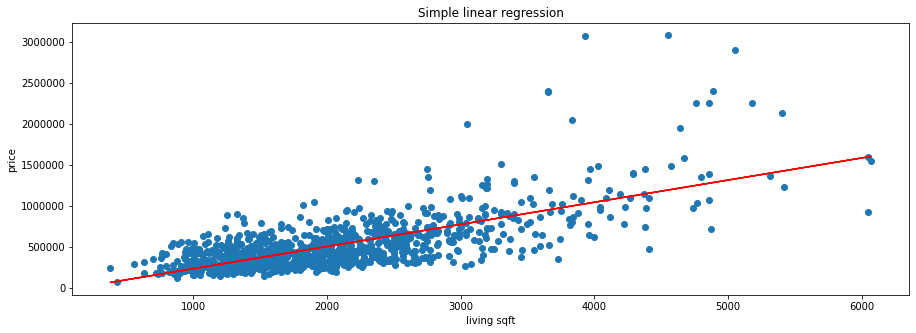

Mean squarred error equals:  57947526161.288376
Score:  0.49670880166311393


In [14]:
#b)

#Your code:
y_pred = model.predict(X)
plt.figure(figsize=(15, 5))
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.ticklabel_format(style='plain')
plt.title('Simple linear regression')
plt.xlabel('living sqft')
plt.ylabel('price')
plt.show()
print('Mean squarred error equals: ', mean_squared_error(y_pred, y))
print('Score: ', model.score(X, y))
#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

Trained model reached score of around 0.50. As for linear model, predicted values are shown as a red line. However, by using non-linear functions we can achieve a better score and mean squarred errors.

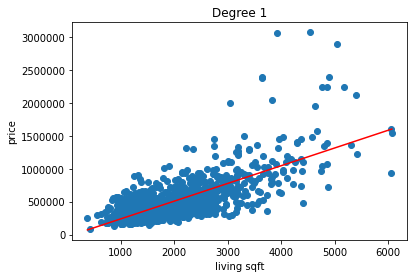

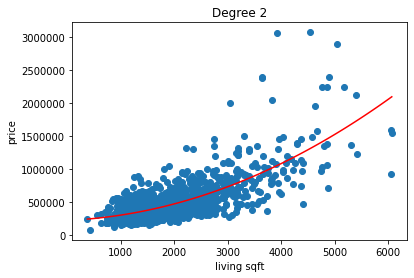

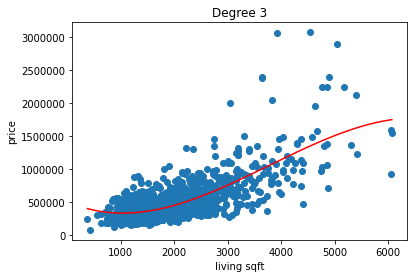

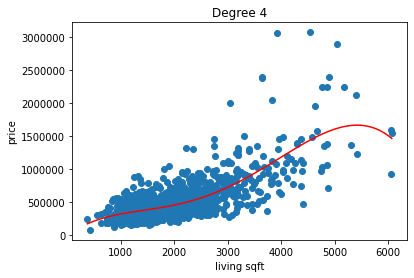

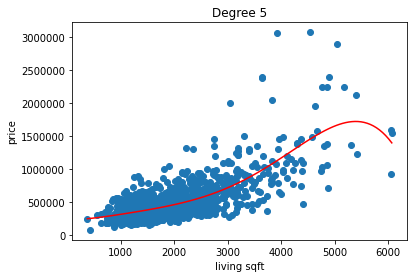

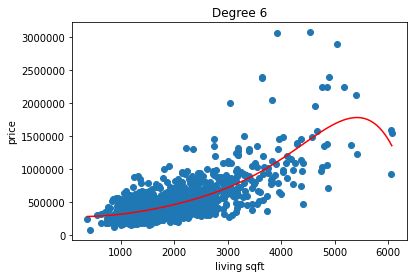

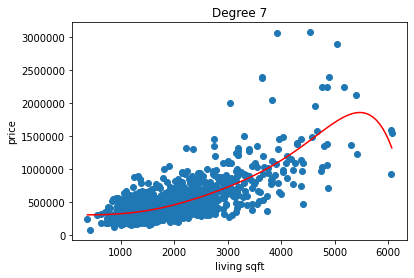

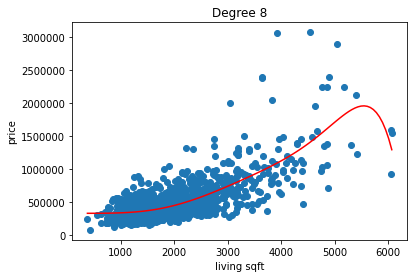

In [15]:
#c)
errors = []

for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    #Your code:
    model_poly = LinearRegression()
    model_poly.fit(X_order, y)
    y_pred = model_poly.predict(X_order)
    plt.scatter(X, y)
    model = np.poly1d(np.polyfit(X.reshape(-1)[np.argsort(X.ravel())], y_pred[np.argsort(X.ravel())], order))
    spacing = np.linspace(min(X), max(X), 100)
    plt.plot(spacing, model(spacing), color='red')
    plt.ticklabel_format(style='plain')
    plt.title('Degree '+str(order))
    plt.xlabel('living sqft')
    plt.ylabel('price')
    plt.show()
    
    errors.append(mean_squared_error(y_pred, y))

* By only looking at 1 or 2 degree plots we can expect a rising tendancy.
* However, from degree 1 to 8 of the polynomial we can see that the model is getting a large curve at the end thats is showing a drop in price per living sqft at areound 5500 living sqft point.
* From degree 5 to 8 plots don't change that much so we could probably end up using degree 5 plot because it achieves the fastest overall stable model so we wouldn't need to calculete further.


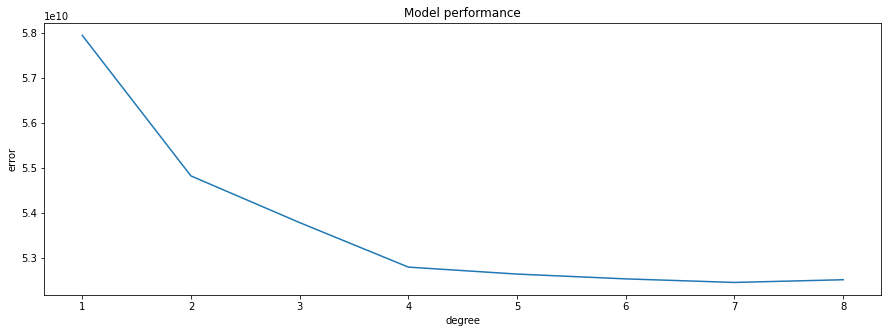

In [16]:
#Your code:
plt.figure(figsize=(15, 5))
plt.plot(range(1,9), errors)
plt.title('Model performance')
plt.xlabel('degree')
plt.ylabel('error')
plt.show()

* The plot above shows us how much the mean squarred error changes with each degree
* As we can see the most drastic change is from degree 1 to 4, after that there is not much change in comparison. It further proves my opinion that we could use degree 5 plot and stop in further calculations.

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

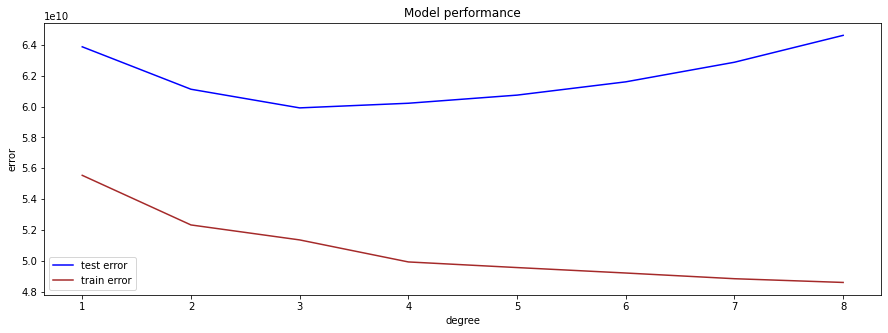

In [17]:
#a)
errors_train = []
errors_test = []
for order in range(1,9):
    model = LinearRegression()
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    errors_train.append(mean_squared_error(y_pred, y_train))
    
    y_pred = model.predict(X_test)
    errors_test.append(mean_squared_error(y_pred, y_test))
    
plt.figure(figsize=(15, 5))
plt.plot(range(1,9), errors_test, label='test error', c='blue')
plt.plot(range(1,9), errors_train, label='train error', c='brown')
plt.title('Model performance')
plt.xlabel('degree')
plt.ylabel('error')
plt.legend()
plt.show()
    

* The test error after degree 3 starts to rise. This means that our model starts making best fit in train data instead of predicting the values.
* This means that the best candidate is degree 3 because it has the best test error and sufficient train error from all polynomial degrees.

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

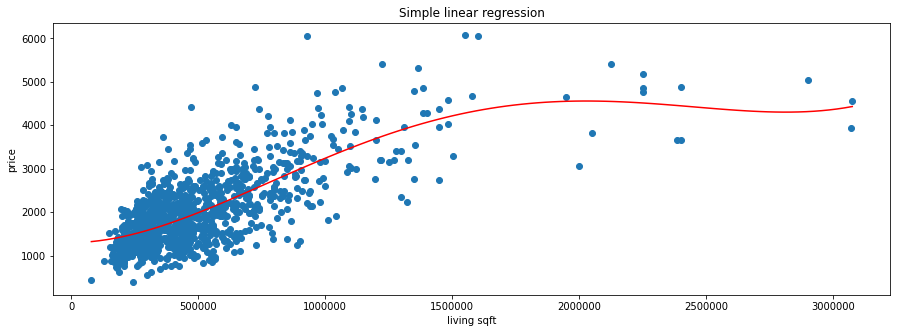

Mean squarred error equals:  364605.34242357325
Order:  4


In [27]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:
order = 4
poly = PolynomialFeatures(order, include_bias = False)
X_order = poly.fit_transform(X)
model = LinearRegression() 
model.fit(X_order, y)
y_pred = model.predict(X_order)
plt.figure(figsize=(15, 5))
plt.scatter(X, y)
model = np.poly1d(np.polyfit(X.reshape(-1)[np.argsort(X.ravel())], y_pred[np.argsort(X.ravel())], order))
spacing = np.linspace(min(X), max(X), 100)
plt.plot(spacing, model(spacing), color='red')
plt.ticklabel_format(style='plain')
plt.title('Simple linear regression')
plt.xlabel('living sqft')
plt.ylabel('price')
plt.show()
print('Mean squarred error equals: ', mean_squared_error(y_pred, y))

Comparing the mean squarred error to the previous model (sqft living to price) this model has much lower values. That means it is better to predict sqft lininf based on price than predicting price based on sqft living.
* error from previous:  57947526161.288376
* error from now:       364605.34242357325

In [19]:
print(house_df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [20]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:
X = house_df[['sqft_living', 'grade', 'view', 'condition', 'yr_built']]
y = house_df.price
poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
model = LinearRegression() 
_= model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 48749250331.21729
Mean squared error equals: 41252915150.61157


By removing sqft_lot and adding condition and yr_build as they seemed more important the new proposed model is better by around 15.4% from starting model.

In [21]:
print((48749250331.21729-41252915150.61157)/48749250331.21729)

0.15377334276267493
